In [3]:
import numpy as np
import time
import sys
import random 
if sys.version_info.major == 2:
    import Tkinter as tk
else:
    import tkinter as tk
from tkinter import *
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

UNIT = 40  
MAZE_H = 4
MAZE_W =  4
origin = np.array([UNIT/2, UNIT/2])


class Maze(tk.Tk, object):
    def __init__(self, agentXY, goalXY, walls=[],pits=[]):
        super(Maze, self).__init__()
        self.action_space = ['u', 'd', 'l', 'r']
        self.n_actions = len(self.action_space)
        self.wallblocks = []
        self.pitblocks=[]
        self.title('maze')
        self.geometry('{0}x{1}'.format(MAZE_H * UNIT, MAZE_W * UNIT))
        self.build_shape_maze(agentXY, goalXY, walls, pits)

    def build_shape_maze(self,agentXY,goalXY, walls,pits):
        self.canvas = tk.Canvas(self, bg='white',
                           height=MAZE_H * UNIT,
                           width=MAZE_W * UNIT, background='green')

        # create grids
        for c in range(0, MAZE_W * UNIT, UNIT):
            x0, y0, x1, y1 = c, 0, c, MAZE_H * UNIT
            self.canvas.create_line(x0, y0, x1, y1)
        for r in range(0, MAZE_H * UNIT, UNIT):
            x0, y0, x1, y1 = 0, r, MAZE_W * UNIT, r
            self.canvas.create_line(x0, y0, x1, y1)  


        for x,y in walls:
            self.add_wall(x,y)
        for x,y in pits:
            self.add_pit(x,y)
        self.add_goal(goalXY[0],goalXY[1])
        self.add_agent(agentXY[0],agentXY[1])
        self.canvas.pack()

    '''Add a solid wall block at coordinate for centre of bloc'''
    def add_wall(self, x, y):
        wall_center = origin + np.array([UNIT * x, UNIT*y])
        self.wallblocks.append(self.canvas.create_rectangle(
            wall_center[0] - 20, wall_center[1] - 20,
            wall_center[0] + 20, wall_center[1] + 20,
            fill='grey'))
        
        

    '''Add a solid pit block at coordinate for centre of bloc'''
    def add_pit(self, x, y):
        pit_center = origin + np.array([UNIT * x, UNIT*y])
        self.pitblocks.append(self.canvas.create_rectangle(
            pit_center[0] - 20, pit_center[1] - 20,
            pit_center[0] + 20, pit_center[1] + 20,
            fill='black'))

    '''Add a solid goal for goal at coordinate for centre of bloc'''
    def add_goal(self, x=4, y=4):
        goal_center = origin + np.array([UNIT * x, UNIT*y])

        self.goal = self.canvas.create_oval(
            goal_center[0] - 20, goal_center[1] - 20,
            goal_center[0] + 20, goal_center[1] + 20,
            fill='yellow')

    '''Add a solid wall for agent at coordinate for centre of bloc'''
    def add_agent(self, x=0, y=0):
        agent_center = origin + np.array([UNIT * x, UNIT*y])

        self.agent = self.canvas.create_rectangle(
            agent_center[0] - 20, agent_center[1] - 20,
            agent_center[0] + 20, agent_center[1] + 20,
            fill='salmon')

    def reset(self, value = 1, resetAgent=True):
        self.update()
        time.sleep(0.2)
        if(value == 0):
            return self.canvas.coords(self.agent)
        else:
            #Reset Agent
            if(resetAgent):
                self.canvas.delete(self.agent)
                self.agent = self.canvas.create_rectangle(origin[0] - 20, origin[1] - 20,
                origin[0] + 20, origin[1] + 20,
                fill='salmon')

            return self.canvas.coords(self.agent)

    def computeReward(self, currstate, action, nextstate):
            reverse=False
            if nextstate == self.canvas.coords(self.goal):
                reward = 50
                done = True
                nextstate = 'terminal'
            
            elif nextstate in [self.canvas.coords(w) for w in self.wallblocks]:
                reward = -0.1
                done = False
                nextstate = currstate
                reverse=True
            
            elif nextstate in [self.canvas.coords(w) for w in self.pitblocks]:
                reward = -10
                done = True
                nextstate = 'terminal'
                reverse=False
                
            else:
                reward = -0.05
                done = False
            return reward,done, reverse

    '''step - definition of one-step dynamics function'''
    def step(self, action):
        s = self.canvas.coords(self.agent)
       
        base_action = np.array([0, 0])
        if action == 0:   # up
            if s[1] > UNIT:
                base_action[1] -= UNIT
        elif action == 1:   # down
            if s[1] < (MAZE_H - 1) * UNIT:
                base_action[1] += UNIT
        elif action == 2:   # right
            if s[0] < (MAZE_W - 1) * UNIT:
                base_action[0] += UNIT
        elif action == 3:   # left
            if s[0] > UNIT:
                base_action[0] -= UNIT

        self.canvas.move(self.agent, base_action[0], base_action[1])  # move agent

        s_ = self.canvas.coords(self.agent)  
        # call the reward function
        reward, done, reverse = self.computeReward(s, action, s_)
        if(reverse):
            self.canvas.move(self.agent, -base_action[0], -base_action[1])  # move agent back
            s_ = self.canvas.coords(self.agent) 
      

        return s_, reward, done

    def render(self, sim_speed=.1):
        time.sleep(sim_speed)
        self.update()

def update():
    for t in range(10):
        s = env.reset()
        while True:
            env.render()
            a =2
            s, r, done = env.step(a)
            if done:
                break
    
if __name__ == '__main__':
    
       #All Tasks
    agentXY=[0,0]
    goalXY=[3,3]

    
    #Task 1
        
    wall_shape= np.array([[2,2], [0,2]])
    pits=np.array([[0,3],[3,0]])

    env = Maze(agentXY,goalXY,wall_shape, pits)

    
    env.after(100, update)
    env.mainloop()
    

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\12027\Anaconda3\envs\arob\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\12027\Anaconda3\envs\arob\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "<ipython-input-4-5ff5f58f4384>", line 155, in update
    s, r, done = env.step(a)
  File "<ipython-input-4-5ff5f58f4384>", line 117, in step
    s = self.canvas.coords(self.agent)
  File "C:\Users\12027\Anaconda3\envs\arob\lib\tkinter\__init__.py", line 2761, in coords
    self.tk.call((self._w, 'coords') + args))]
_tkinter.TclError: invalid command name ".!canvas"


In [5]:

def check_state_exist( state, q_table):

    actions = ['u','d','l','r']
    if state not in q_table.index:
        # append new state to q table
        q_table =q_table.append(
            pd.Series(
                [0]*len(actions),
                index=q_table.columns,
                name=state,))
        
        
    return q_table

In [6]:
x = int(random.choice(list(range(0,4))))
y = int(random.choice(list(range(0,4))))

goal = [x,y]


In [7]:
def goal_generator():

    
    agentXY=[[0,0]]
    wall_shape =  [2,2], [0,2] #= np.array([[2,2], [0,2]])
    pits= [0,3],[3,0] #np.array([[0,3],[3,0]])

    x = int(random.choice(list(range(0,6))))
    y = int(random.choice(list(range(0,6))))
    
    goal = [x,y]

    result = []

#     print(goal)
    if goal in wall_shape or goal in pits or goal in agentXY:
        result = goal_generator()
        
    else:
#         print("inside else", goal)
        result = goal

    return result


In [8]:

def update(env):
    
    
    actions = list(range(4))
    reward_episodes_list = []
    rewards_list =()
    q_table = pd.DataFrame(columns=actions, dtype=np.float64)
    
    learning_rate=0.6
    gamma=0.9
    epsilon = 0.9

    episode = 10
    
    
    
    for epoch in range(0, episode):
        

        #Select a random state
#         env =Maze(agentXY,goal_generator(),wall_shape, pits)
        int_state = env.reset()

        episode_reward = 0
        while True:

            env.render()
            #intialize the action for the state

            q_table = check_state_exist(str(int_state),q_table)
#             print('q_tab1', q_table)

            if np.random.uniform() > epsilon:

                action = np.random.choice(actions)

            else:

                max_val_fut_reward = q_table.loc[str(int_state), :]
                action = np.random.choice(max_val_fut_reward[max_val_fut_reward==np.max(max_val_fut_reward)].index)

            new_state, reward, done = env.step(action)          
            episode_reward += reward

            q_table = check_state_exist(str(new_state),q_table)
#             print('q_tab2', q_table)

            q_predict = q_table.loc[str(int_state), action]

            if new_state != 'terminal':

    #             current_q = q_table.loc[str(int_state), action]
                  max_exp_reward = np.max(q_table.loc[str(new_state), :])

                  q_target =( reward + gamma* max_exp_reward)


            else:            
                #Update the Q_tabel using the bellmans equation
                #New Q value = Current Q value + lr * [Reward + discount_rate * (highest Q value between possible actions from the new state s’ ) — Current Q value ]

    #             current_q = q_table.loc[str(int_state), action]

                q_target= reward
        


            q_table.loc[str(int_state), action] += learning_rate * ( q_target - q_predict)
            int_state = new_state

            if done:
                break

        print('Game over, epoch : {}/{}'.format(epoch, episode))
        reward_episodes_list.append([episode_reward, epoch])
   
    plt.xlabel('Number of episodes')
    plt.ylabel(' Reward obtained')
    plt.title('Reward obtained for the episode')
    print(reward_episodes_list)   
    
    plt.plot(np.asarray(reward_episodes_list)[:,1],np.asarray(reward_episodes_list)[:,0])
    q_table.head()
    env.destroy()
    
# Convert the Q table to CSV and save, Uncomment if you are generating for a new grid
#     q_table.to_csv(r'C:\Users\12027\PyCharm_Projects\Untitled Folder\Q_TABLE_4.csv')
  
if __name__ == '__main__':
    
    env = Maze(agentXY,goalXY,wall_shape, pits)
    
    env.after(100, update(env))

    env.mainloop()
    



TclError: invalid command name ".!canvas"

Game over, epoch : 0/100
Game over, epoch : 1/100
Game over, epoch : 2/100
Game over, epoch : 3/100
Game over, epoch : 4/100
Game over, epoch : 5/100
Game over, epoch : 6/100
Game over, epoch : 7/100
Game over, epoch : 8/100
Game over, epoch : 9/100
Game over, epoch : 10/100
Game over, epoch : 11/100
Game over, epoch : 12/100
Game over, epoch : 13/100
Game over, epoch : 14/100
Game over, epoch : 15/100
Game over, epoch : 16/100
Game over, epoch : 17/100
Game over, epoch : 18/100
Game over, epoch : 19/100
Game over, epoch : 20/100
Game over, epoch : 21/100
Game over, epoch : 22/100
Game over, epoch : 23/100
Game over, epoch : 24/100
Game over, epoch : 25/100
Game over, epoch : 26/100
Game over, epoch : 27/100
Game over, epoch : 28/100
Game over, epoch : 29/100
Game over, epoch : 30/100
Game over, epoch : 31/100
Game over, epoch : 32/100
Game over, epoch : 33/100
Game over, epoch : 34/100
Game over, epoch : 35/100
Game over, epoch : 36/100
Game over, epoch : 37/100
Game over, epoch : 38/

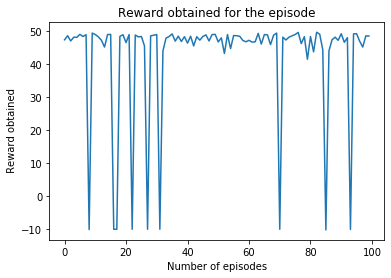

In [244]:


########################### Epsilon_Greedy approach for choosing action #############

def update(env):
    
    
    actions = list(range(4))
    reward_episodes_list = []
    rewards_list =()
    q_table = pd.DataFrame(columns=actions, dtype=np.float64)
    
    learning_rate=0.6
    gamma=0.9

    episode = 100

    epsilon = 1  # not a constant, qoing to be decayed
    START_EPSILON_DECAYING = 1
    END_EPSILON_DECAYING = episode//2
    epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

    
    
    
    for epoch in range(0, episode):
        

        #Select a random state
#         env =Maze(agentXY,goal_generator(),wall_shape, pits)
        int_state = env.reset()

        episode_reward = 0
        while True:

            env.render()
            #intialize the action for the state

            q_table = check_state_exist(str(int_state),q_table)
#             print('q_tab1', q_table)

            if np.random.uniform() > epsilon:

                action = np.random.choice(actions)

            else:

                max_val_fut_reward = q_table.loc[str(int_state), :]
                action = np.random.choice(max_val_fut_reward[max_val_fut_reward==np.max(max_val_fut_reward)].index)

            new_state, reward, done = env.step(action)          
            episode_reward += reward

            q_table = check_state_exist(str(new_state),q_table)
#             print('q_tab2', q_table)

            q_predict = q_table.loc[str(int_state), action]

            if new_state != 'terminal':
            
                
            

    #             current_q = q_table.loc[str(int_state), action]
                  max_exp_reward = np.max(q_table.loc[str(new_state), :])
        
                  current_q = q_table.loc[str(int_state), action]
            
                  new_q = (1 - learning_rate) * current_q + learning_rate * ( reward + gamma * max_exp_reward)
                
                
                  current_q = new_q 

                  


            else:            
                #Update the Q_tabel using the bellmans equation
                #New Q value = Current Q value + lr * [Reward + discount_rate * (highest Q value between possible actions from the new state s’ ) — Current Q value ]

                current_q = q_table.loc[str(int_state), action]

                current_q = reward
        


#             q_table.loc[str(int_state), action] += learning_rate * ( q_target - q_predict)
            int_state = new_state
            
            if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
                
                epsilon -= epsilon_decay_value
            
            if done:
                break

        print('Game over, epoch : {}/{}'.format(epoch, episode))
        reward_episodes_list.append([episode_reward, epoch])
   
    plt.xlabel('Number of episodes')
    plt.ylabel(' Reward obtained')
    plt.title('Reward obtained for the episode')
    print(reward_episodes_list)   
    
    plt.plot(np.asarray(reward_episodes_list)[:,1],np.asarray(reward_episodes_list)[:,0])
    
    
    env.destroy()
#     q_table.to_csv(r'C:\Users\12027\PyCharm_Projects\Untitled Folder\Q_TABLE_4.csv')
  
if __name__ == '__main__':
    
    env = Maze(agentXY,goalXY,wall_shape, pits)
    
    env.after(100, update(env))

    env.mainloop()
    
